# Students Performance EDA
*Assessing students performance in maths, reading & writing on the basis of various factors* 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
std = pd.read_csv(r'C:\Users\Acer\Downloads\Study\Data Sets\StudentsPerformance.csv')
std.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
std.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [15]:
std.isna().sum() # check for null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Univariate Analysis using Bargraph:
*To check the distribution of students across gender, race/ethnicity, their lunch status, and whether they have a test preparation course or not.*

(array([0, 1]), [Text(0, 0, 'none'), Text(1, 0, 'completed')])

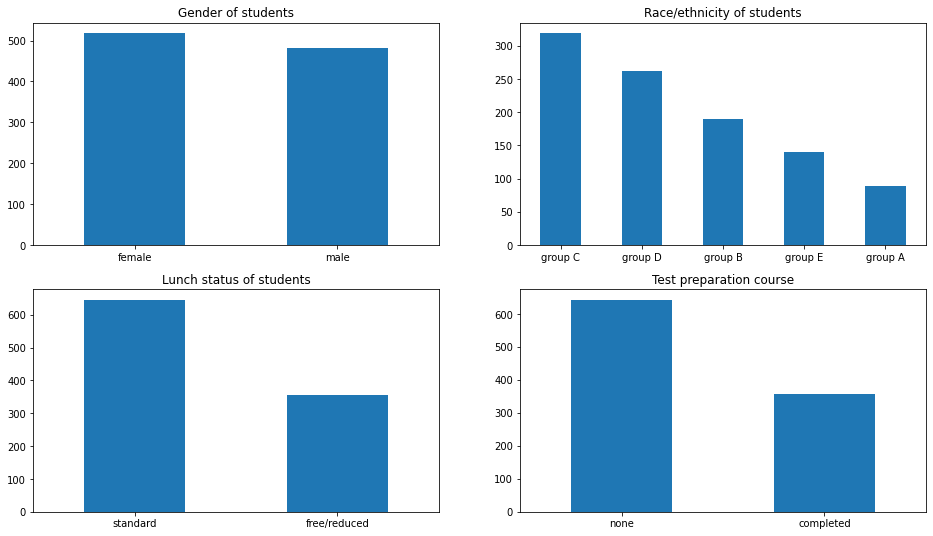

In [16]:
plt.subplot(221)
std.gender.value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
std['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
std.lunch.value_counts().plot(kind='bar', title='Lunch status of students', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(224)
std['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course', figsize=(16,9))
plt.xticks(rotation=0)

*We can infer from the above that:*
- *There are more girls in the school than boys* 
- *The majority of the students belong to groups C and D* 
- *More than 60% of the students have a standard lunch at school*
- *More than 60% of students have not taken any test preparation course*

# Boxplot
*Combined box plot representing math score, reading score and writing score*

<AxesSubplot:>

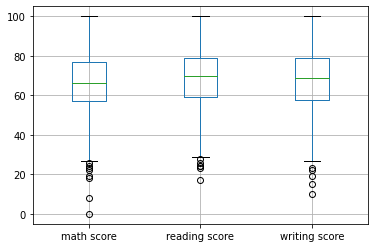

In [17]:
std.boxplot()

*The median score for math, reading & writing is nearly the same at around 70.*

*We also observe that the three have a few outliers which represent scores below 30.*

# Distribution plot

<AxesSubplot:xlabel='math score', ylabel='Density'>

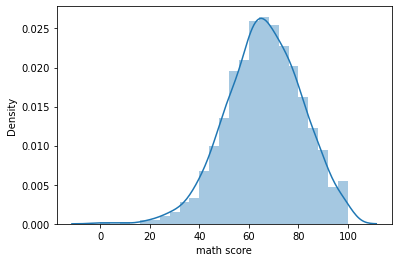

In [18]:
sns.distplot(std['math score'])

*The above graph represents a Normal Distribution. The peak is at around 65 marks, the mean of the math score of the students in the dataset.*

# Heat Map
*To display correlation between features*

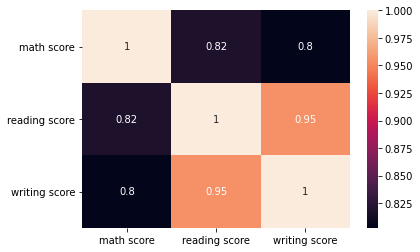

In [19]:
corr = std.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

*The heatmap shows that the 3 scores are highly correlated. Reading score has a correlation coefficient of 0.95 with the writing score. Math score has a correlation coefficient of 0.82 with the reading score, and 0.80 with the writing score.*

# Bivariate Analysis
*To understand the relationship between the math score and the writing score of students of different genders*

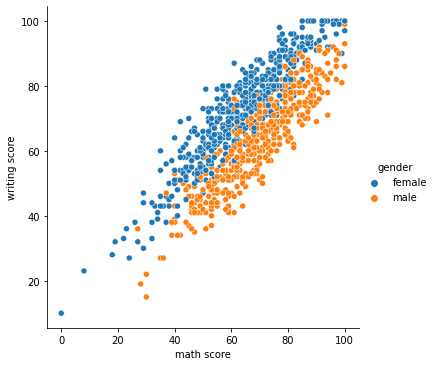

In [20]:
sns.relplot(x='math score', y='writing score', hue='gender', data=std)

*The graph shows a clear difference in scores between the male and female students. For the same math score, female students are more likely to have a higher writing score than male students. However, for the same writing score, male students are expected to have a higher math score than female students.*

# Line Plot
*To check whether there is an impact on a students school performance vis-a-vis their parents’ level of education.*

<AxesSubplot:>

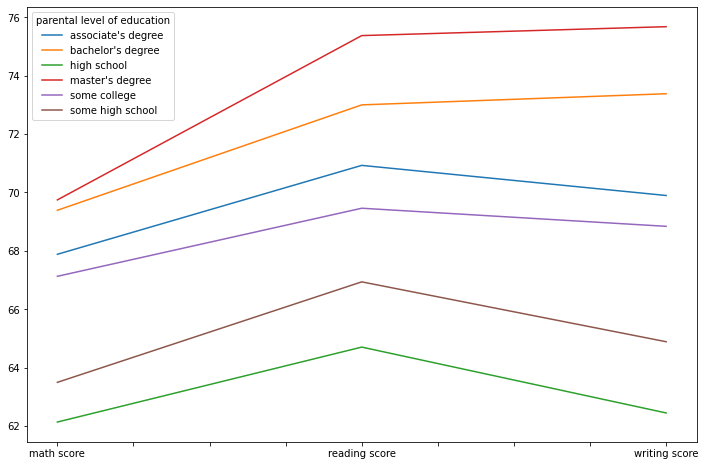

In [21]:
std.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

*It is fairly obvious from this graph that students whose parents are more educated - i.e. having master’s degree, bachelor’s degree, and associate’s degree - are performing better on average than students whose parents are less educated - i.e. having high school education.*

*The more educated parents are, the more likely they are to push their students towards studies.*

# Bar graph 
*To understand if the test preparation course impacts students’ performance.*

<AxesSubplot:>

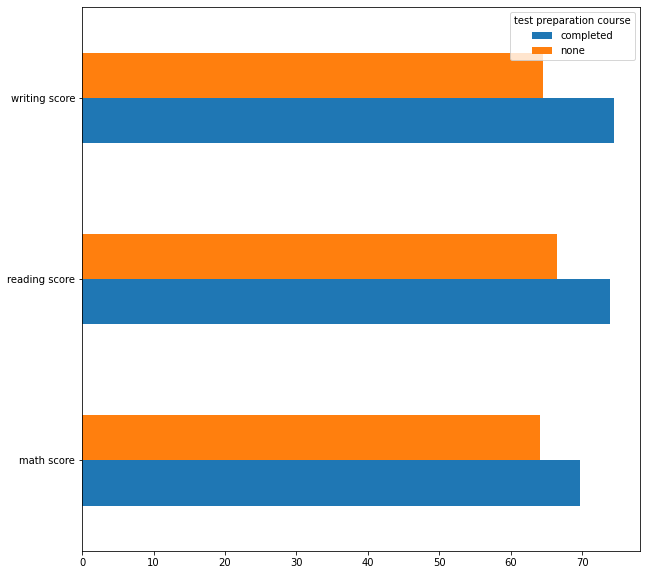

In [22]:
std.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))

#### *Conclusion:*
#### *It is evident that those students that did take the preparation test performed better, on average, than those who didn't opt for the course.*